In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

442 10
(442,)


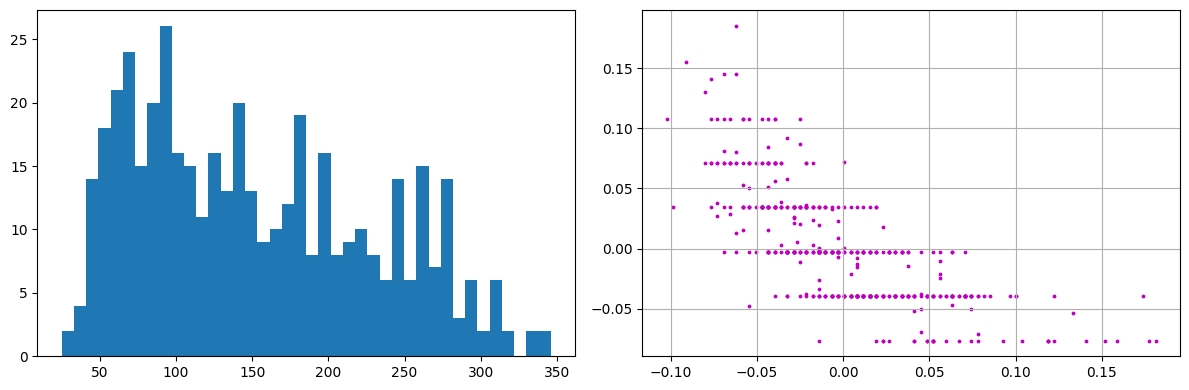

In [3]:
#QUESTION 01
###########################################################
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target
# Inspect sizes
#
NumData, NumFeatures = X.shape
print(NumData, NumFeatures)
print(t.shape)
# 442 X 10
# 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(t, bins=40)
ax[1].scatter(X[:,6], X[:,7], c='m', s=3)
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

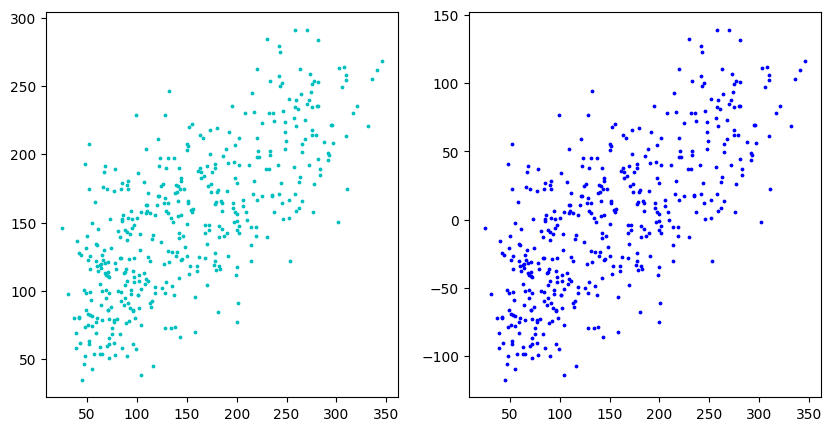

In [4]:
# Linear regression using sklearn
#
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-incerse solution to linear regression
#
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[1].scatter(t, th2, c='blue', s=3)

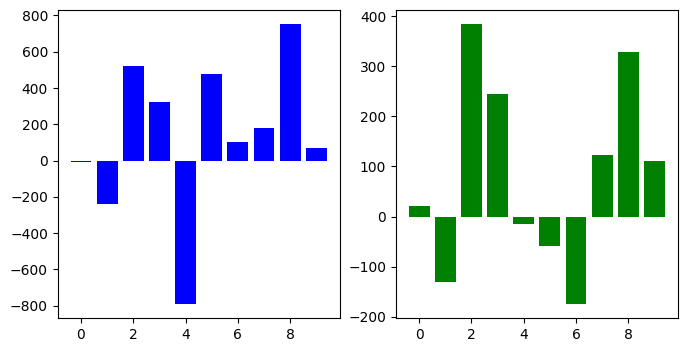

In [5]:
#QUESTION02
##############################################

gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)), w,color = 'blue')
ax[1].bar(np.arange(len(wR)), wR,color = 'green')
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

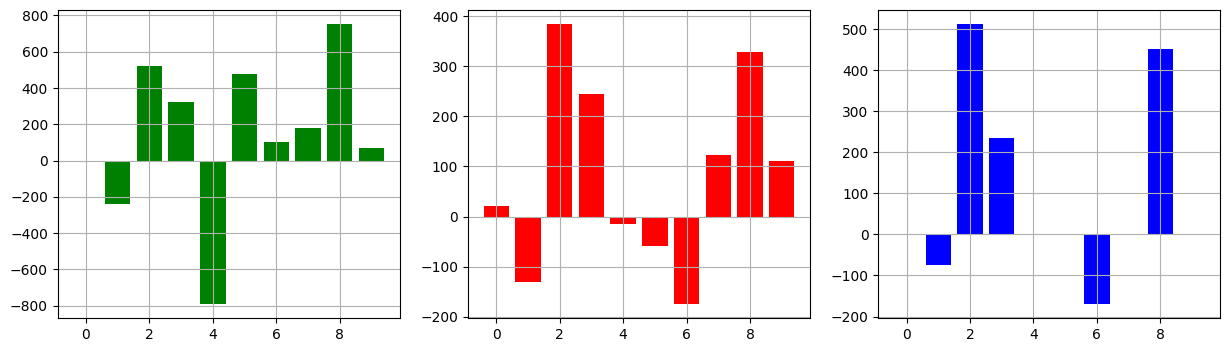

In [6]:
#QUESTION03 - a
##########################################################
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].bar(np.arange(len(w)), w, color = 'green')
ax[1].bar(np.arange(len(wR)), wR, color = 'red')
ax[2].bar(np.arange(len(ll.coef_)), ll.coef_, color = 'blue')
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
plt.savefig("solutions.png")

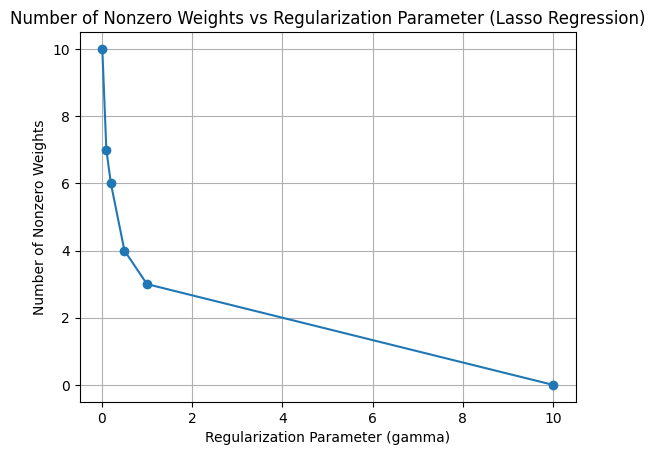

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Define a range of gamma values
gamma_values = [0.01, 0.1,0.2, 0.5, 1.0, 10.0]

# Initialize a list to store the number of nonzero weights for each gamma value
nonzero_weights_count = []

# Iterate over gamma values
for gamma in gamma_values:
    # Fit Lasso model
    lasso = Lasso(alpha=gamma)
    lasso.fit(X, t)

    # Count the number of nonzero weights
    nonzero_count = np.count_nonzero(lasso.coef_)

    # Append the count to the list
    nonzero_weights_count.append(nonzero_count)

# Plot the results
plt.plot(gamma_values, nonzero_weights_count, marker='o')
plt.xlabel('Regularization Parameter (gamma)')
plt.ylabel('Number of Nonzero Weights')
plt.title('Number of Nonzero Weights vs Regularization Parameter (Lasso Regression)')
plt.grid(True)
plt.show()

In [10]:
#QUESTION03 - b
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1-1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.

N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
  Z1= np.random.randn()
  Z2= np.random.randn()
  y = np.append(y, 3*Z1- 1.5*Z2 + 2*np.random.randn())
  Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
  X = np.vstack ((X, Xarr.tolist()))

Text(0, 0.5, 'Regression Coefficients')

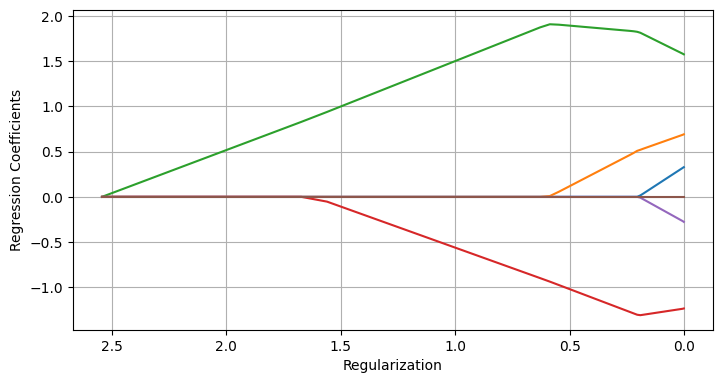

In [11]:
# Compute regressions with Lasso and return paths
#
alphas_lasso, coefs_lasso, _ = lasso_path(X, y)
# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
  ax.plot(alphas_lasso, coefs_lasso[i,:])
ax.grid(True)

# Adjust margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Invert x-axis
plt.gca().invert_xaxis()
ax.set_xlabel("Regularization")
ax.set_ylabel("Regression Coefficients")

(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


Text(0.5, 1.0, 'Histogram of Log Solubility')

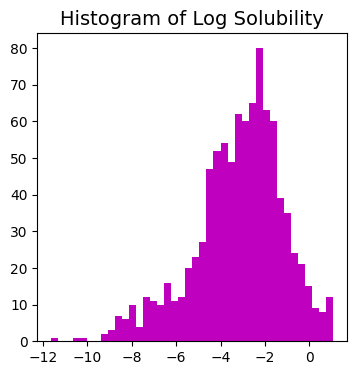

In [12]:
#QUESTION04
import pandas as pd

sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)
print(sol.columns)

t = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(t, bins=40, facecolor='m')
ax.set_title("Histogram of Log Solubility", fontsize=14)


In [13]:
colnames = sol.columns
X = sol[colnames[5:len(colnames)-1]]
N, p = X.shape
print("X.shape",X.shape)
print("t.shape",t.shape)


X.shape (932, 2255)
t.shape (932,)


In [14]:
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)


In [15]:
# Regularized regression
#
gamma = 2.3
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w.to_numpy()
th_test = X_test @ w.to_numpy()


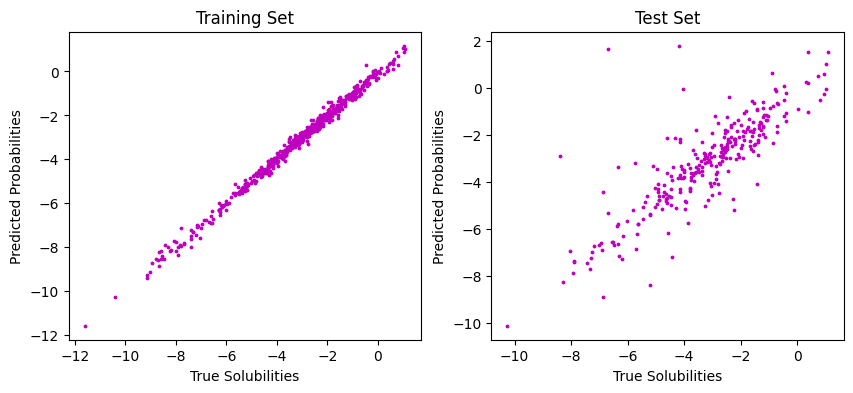

In [16]:
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c='m', s=3)
ax[1].scatter(t_test, th_test, c='m', s=3)
#ax[1].bar(np.arange(len(w)), w,color='red')

ax[0].set_xlabel('True Solubilities')
ax[0].set_ylabel('Predicted Probabilities')
ax[0].set_title('Training Set')


ax[1].set_xlabel('True Solubilities')
ax[1].set_ylabel('Predicted Probabilities')
ax[1].set_title('Test Set')


plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.302e+01, tolerance: 2.691e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+01, tolerance: 2.691e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.536e+01, tolerance: 2.691e

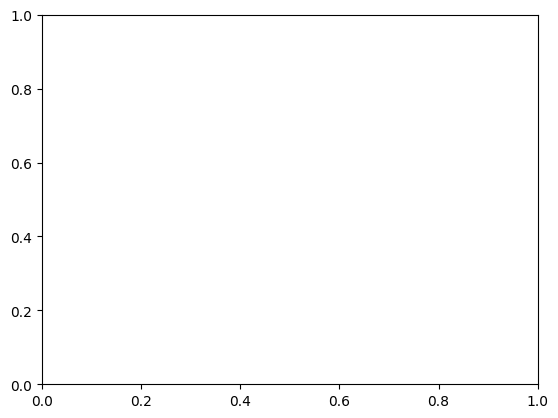

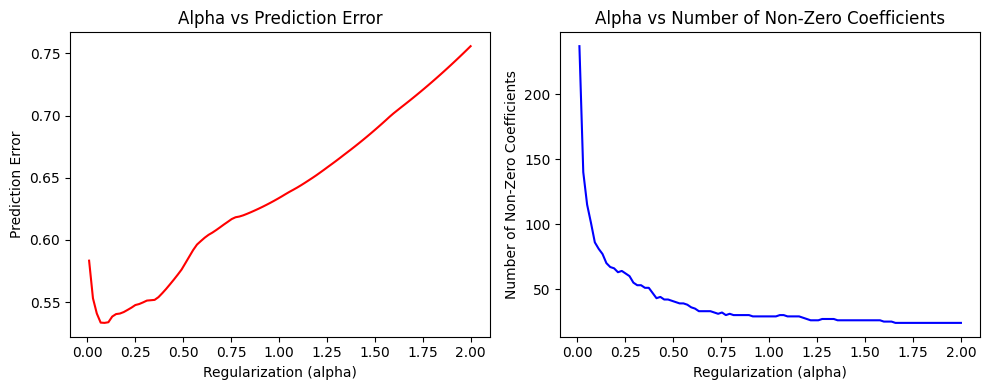

In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Define a range of regularization parameters
alphas = np.logspace(-4, 2, 100)
num_non_zero_coeffs = []
prediction_errors = []

# Iterate over each alpha value
for alpha in alphas:
    # Fit Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, t_train)

    # Calculate number of non-zero coefficients
    num_non_zero_coeffs.append(np.sum(lasso.coef_ != 0))

    # Make predictions on test set
    predictions = lasso.predict(X_test)

    # Calculate mean squared error
    prediction_errors.append(mean_squared_error(t_test, predictions))

# Plot how prediction error and number of non-zero coefficients change with increasing regularization
fig, ax1 = plt.subplots()

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Define a range of regularization parameters
alphas = np.linspace(0.01, 2, 100)
num_non_zero_coeffs = []
prediction_errors = []

# Iterate over each alpha value
for alpha in alphas:
    # Fit Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, t_train)

    # Calculate number of non-zero coefficients
    num_non_zero_coeffs.append(np.sum(lasso.coef_ != 0))

    # Make predictions on test set
    predictions = lasso.predict(X_test)

    # Calculate mean squared error
    prediction_errors.append(mean_squared_error(t_test, predictions))


# Plot alpha against prediction error
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].plot(alphas, prediction_errors, color='red')
ax[0].set_xlabel('Regularization (alpha)')
ax[0].set_ylabel('Prediction Error')
ax[0].set_title('Alpha vs Prediction Error')

# Plot alpha against number of non-zero coefficients
plt.subplot(1, 2, 2)
ax[1].plot(alphas, num_non_zero_coeffs, color='blue')
ax[1].set_xlabel('Regularization (alpha)')
ax[1].set_ylabel('Number of Non-Zero Coefficients')
ax[1].set_title('Alpha vs Number of Non-Zero Coefficients')

plt.tight_layout()
plt.show()


In [22]:
from sklearn.linear_model import LassoCV

# Define a range of alpha values
alphas = np.linspace(0, 2, 100)

# Initialize LassoCV model with k-fold cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)

# Fit LassoCV model on training data
lasso_cv.fit(X_train, t_train)

# Get the best alpha value selected by cross-validation
best_alpha = lasso_cv.alpha_

# Print the best alpha value
print("Best alpha value:", best_alpha)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+02, tolerance: 2.136e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+02, tolerance: 2.136e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.290e+01, tolerance: 2.136e

Best alpha value: 0.12121212121212122


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+02, tolerance: 2.691e-01
  model = cd_fast.enet_coordinate_descent(


In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Use SelectKBest with f_regression to select the top 10 features
selector = SelectKBest(score_func=f_regression, k=10)
X_top10 = selector.fit_transform(X_train, t_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the top 10 features
top10_feature_names = sol.columns[5:][selected_indices]
print("Top 10 features:", list(top10_feature_names))


[1153 1162 1528 2216 2217 2218 2219 2227 2228 2229]
Top 10 features: ['P_VSA_v_3', 'P_VSA_p_3', 'nCb-', 'MLOGP', 'MLOGP2', 'ALOGP', 'ALOGP2', 'BLTF96', 'BLTD48', 'BLTA96']


In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Train linear regression model using all features and quadratic regularization
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, t_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(t_test, ridge_predictions)

# Train linear regression model using only top 10 features
ridge_top10 = Ridge(alpha=0.1)
ridge_top10.fit(X_train.iloc[:, selected_indices], t_train)
ridge_top10_predictions = ridge_top10.predict(X_test.iloc[:, selected_indices])
ridge_top10_mse = mean_squared_error(t_test, ridge_top10_predictions)

print("MSE with all features:", ridge_mse)
print("MSE with top 10 features only:", ridge_top10_mse)


MSE with all features: 2.7545856098040398
MSE with top 10 features only: 0.8978906081406246
